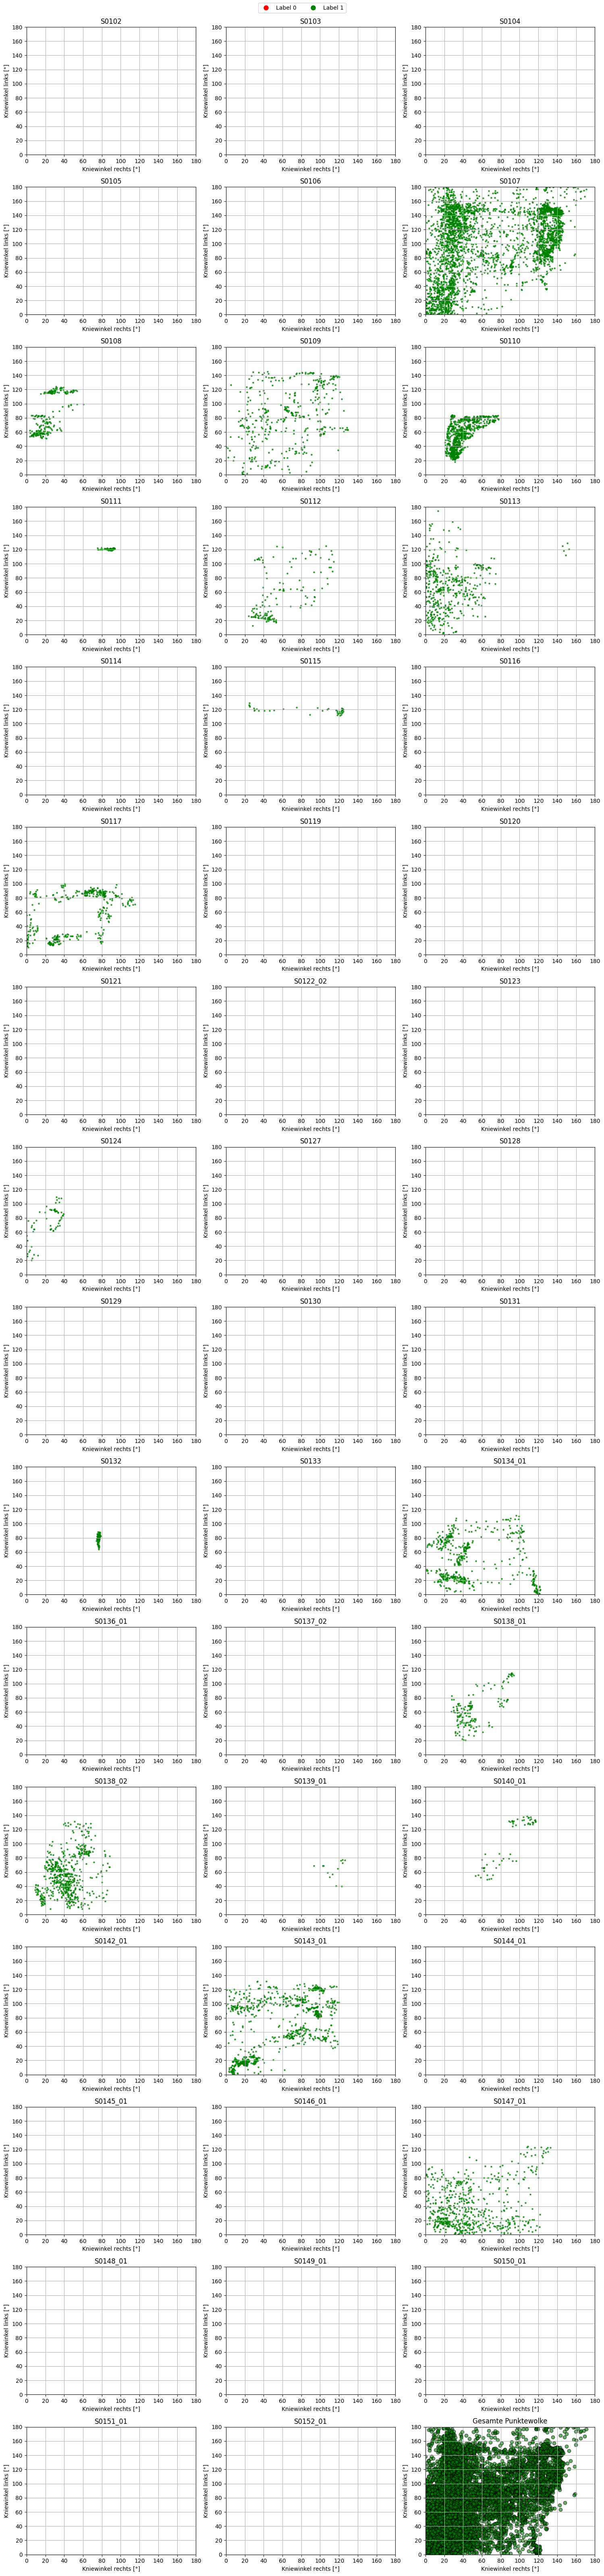

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import os
import math

# Load knee angle data
results_path_knee_angle = "../imt-main/examples/results"
ring_angles_kl = np.load(os.path.join(results_path_knee_angle, "Angles_CAM_Knee_Left.npy"), allow_pickle=True)
ring_angles_kr = np.load(os.path.join(results_path_knee_angle, "Angles_CAM_Knee_Right.npy"), allow_pickle=True)
seq_names = np.load(os.path.join(results_path_knee_angle, "Sequences_names.npy"), allow_pickle=True)

# Load labels
results_path_label = "./results"
labels_extendedLeg_100 = np.load(os.path.join(results_path_label, "labels_extendedLeg_CAM.npy"), allow_pickle=True)
labels_stiffMovement_100 = np.load(os.path.join(results_path_label, "labels_stiffMovement_CAM.npy"), allow_pickle=True)

y_stiffMovement = [entry['behavior_label'] for entry in labels_stiffMovement_100]
y_extendedLeg = [entry['behavior_label'] for entry in labels_extendedLeg_100]

# Sammellisten für den Gesamtplot
all_kr, all_kl, all_labels = [], [], []

# Subplot-Rastergröße berechnen (letzter Platz für Gesamtplot)
cols = 3
rows = math.ceil(len(ring_angles_kl) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()

plot_idx = 0
for i in range(len(ring_angles_kl)):
    knie_links = ring_angles_kl[i]
    knie_rechts = ring_angles_kr[i]
    labels = labels_extendedLeg_100[i]['behavior_label']

    # Farbliste je nach Label
    farben = ['red' if label == 0 else 'green' for label in labels]

    # Punkte für Gesamtplot sammeln
    all_kl.extend(knie_links)
    all_kr.extend(knie_rechts)
    all_labels.extend(labels)

    # Nur Label-1-Punkte extrahieren (Auskommentieren wenn beide Labels angezigt werden sollen)
    knie_rechts = [kr for kr, l in zip(knie_rechts, labels) if l == 1]
    knie_links = [kl for kl, l in zip(knie_links, labels) if l == 1]

    ax = axes[plot_idx]
    #ax.scatter(knie_rechts, knie_links, c=farben, alpha=0.7, edgecolor='k')    # beide Label
    ax.scatter(knie_rechts, knie_links, c='green', alpha=0.7, edgecolor='green', s=5)    # Label 1
    ax.set_title(f'{seq_names[i]}')
    ax.set_xlabel('Kniewinkel rechts [°]')
    ax.set_ylabel('Kniewinkel links [°]')
    ax.set_xlim(0, 180)
    ax.set_ylim(0, 180)
    ax.grid(True)

    plot_idx += 1

# Letzter Plot: Gesamte Punktewolke
farben_gesamt = ['red' if label == 0 else 'green' for label in all_labels]

# Nur Label-1-Punkte für Gesamtplot  (Auskommentieren wenn beide Labels angezigt werden sollen)
all_kr = [kr for kr, l in zip(all_kr, all_labels) if l == 1]
all_kl = [kl for kl, l in zip(all_kl, all_labels) if l == 1]

ax = axes[plot_idx]
#ax.scatter(all_kr, all_kl, c=farben_gesamt, alpha=0.6, edgecolor='k')      # beide Label
ax.scatter(all_kr, all_kl, c='green', alpha=0.6, edgecolor='k')             # Label 1
ax.set_title('Gesamte Punktewolke')
ax.set_xlabel('Kniewinkel rechts [°]')
ax.set_ylabel('Kniewinkel links [°]')
ax.set_xlim(0, 180)
ax.set_ylim(0, 180)
ax.grid(True)

# Leere Subplots ausblenden
for j in range(plot_idx + 1, len(axes)):
    fig.delaxes(axes[j])

# Gemeinsame Legende
fig.legend(
    handles=[
        plt.Line2D([0], [0], marker='o', color='w', label='Label 0', markerfacecolor='red', markersize=10),
        plt.Line2D([0], [0], marker='o', color='w', label='Label 1', markerfacecolor='green', markersize=10)
    ],
    loc='upper center', ncol=2#, bbox_to_anchor=(0.5, 1.02)
)

plt.tight_layout()
plt.subplots_adjust(top=0.99)
plt.show()


In [30]:
index = np.where(seq_names == 'S0110')[0][0]

aa=labels_extendedLeg_100[index]['behavior_label']
print(index)

8
